# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

# Saving data

In [2]:
url = "http://www.football-data.co.uk/mmz4281/1819/E0.csv" # the dataset we will be using

In [3]:
### Saving the csv file to my Predictor folder ###

testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("~/Desktop/Bundesliga-Predictor/datasets/E0.csv")

In [4]:
### Reading the csv file ###

df = pd.read_csv("~/Desktop/Bundesliga-Predictor/datasets/E0.csv")
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [5]:
### Head of the csv file ### -- more on the abbreviations in notes.txt 

df.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


# Cleaning the data

In [6]:
### Removing betting data ###
# Bonus: Add betting data as the input to improve your model

import warnings
warnings.filterwarnings('ignore')

bet_16 = df.ix[:,23:] ## for future purposes

NUMBEROFTEAMS = 20 # constant for the number of teams in the Premier League
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1) # division and date aren't important

### Creating a feature table ###

feature_table = df.ix[:,:23]

In [7]:
res_16.tail(10)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
294,294,Newcastle,Everton,3,2,H,0,2,A,L Mason,...,7,7,3,13,10,8,2,3,1,0
295,295,Southampton,Tottenham,2,1,H,0,1,A,K Friend,...,16,4,5,16,9,1,10,4,2,0
296,296,Arsenal,Man United,2,0,H,1,0,H,J Moss,...,14,3,4,12,18,5,2,2,2,0
297,297,Chelsea,Wolves,1,1,D,0,0,D,M Oliver,...,2,6,1,8,14,13,0,1,4,0
298,298,Liverpool,Burnley,4,2,H,2,1,H,A Marriner,...,3,5,2,4,7,7,3,2,0,0
299,299,Bournemouth,Newcastle,2,2,D,0,1,A,M Dean,...,12,3,4,9,12,6,6,3,2,0
300,300,Burnley,Leicester,1,2,A,1,1,D,M Oliver,...,9,2,4,9,10,9,3,1,1,0
301,301,West Ham,Huddersfield,4,3,H,1,2,A,J Moss,...,15,5,5,7,15,5,8,0,2,0
302,302,Everton,Chelsea,2,0,H,0,0,D,A Taylor,...,16,8,5,17,9,3,4,1,2,0
303,303,Fulham,Liverpool,1,2,A,0,1,A,C Pawson,...,16,2,6,11,7,1,10,2,1,0


In [8]:
### Creating a new table which will be used to train the model ###

# Team, Home Goals Scored, Away Goals Scored, Home Attacking Strength, Away Attacking Strength, 
# Home Goals Conceded, Away Goals Conceded, Home Defensive Strength, Away Defensive Strength
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table = table[:-10]
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [9]:
#res_16 = res_16[:-10] #deleting the last 10 
#res_16.shape[0]

In [10]:
### Data analysis for Home Goals Scored, AGS, Home Goals Conceded, AGC ###

avg_HGS = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_AGS = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_HGC = avg_AGS # HGC = AGS
avg_AGC = avg_HGS # AGC = HGS
print("Average number of goals at home",avg_HGS)
print("Average number of goals away", avg_AGS)
print("Average number of goals conceded at home",avg_HGC)
print("Average number of goals conceded away",avg_AGC)

Average number of goals at home 1.5888157894736843
Average number of goals away 1.2598684210526316
Average number of goals conceded at home 1.2598684210526316
Average number of goals conceded away 1.5888157894736843


In [11]:
### Grouping by HomeTeam and AwayTeam ###
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

### List of Arsenal home games ###
list(res_home)[0][1]

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
7,7,Arsenal,Man City,0,2,A,0,1,A,M Oliver,...,17,3,8,11,14,2,9,2,2,0
20,20,Arsenal,West Ham,3,1,H,1,1,D,G Scott,...,13,10,5,16,13,10,2,1,3,0
58,58,Arsenal,Everton,2,0,H,0,0,D,J Moss,...,9,5,6,17,12,5,9,2,1,0
60,60,Arsenal,Watford,2,0,H,0,0,D,A Taylor,...,13,2,4,11,17,6,6,2,2,0
89,89,Arsenal,Leicester,3,1,H,1,1,D,C Kavanagh,...,8,6,2,10,10,6,4,2,2,0
100,100,Arsenal,Liverpool,1,1,D,0,0,D,A Marriner,...,13,4,4,7,7,5,8,1,1,0
116,116,Arsenal,Wolves,1,1,D,0,1,A,S Attwell,...,12,3,5,9,16,11,2,2,2,0
137,137,Arsenal,Tottenham,4,2,H,1,2,A,M Dean,...,11,7,6,15,17,8,5,3,3,0
150,150,Arsenal,Huddersfield,1,0,H,0,0,D,P Tierney,...,6,2,0,13,20,7,1,5,4,0
171,171,Arsenal,Burnley,3,1,H,1,0,H,K Friend,...,7,6,2,10,14,1,3,2,5,0


In [12]:
### Adding HGS, HGC, AGS, AGC to the table ###

table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values

### Adding the the team to the table ### -- implemented in a strange manner

teams = []
i = 0
while i < NUMBEROFTEAMS:
    x = list(res_home.HomeTeam)[i][0]
    teams.append(x)
    i+=1
    
    
table.Team = teams
table # HAS, AAS, HDS, ADS still missing

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,37,26,NaN,NaN,12,27,NaN,NaN
1,Bournemouth,28,15,NaN,NaN,21,35,NaN,NaN
2,Brighton,17,15,NaN,NaN,15,27,NaN,NaN
3,Burnley,19,16,NaN,NaN,28,31,NaN,NaN
4,Cardiff,18,9,NaN,NaN,31,26,NaN,NaN
5,Chelsea,29,21,NaN,NaN,10,23,NaN,NaN
6,Crystal Palace,11,25,NaN,NaN,17,24,NaN,NaN
7,Everton,23,20,NaN,NaN,21,21,NaN,NaN
8,Fulham,19,10,NaN,NaN,30,40,NaN,NaN
9,Huddersfield,7,11,NaN,NaN,24,33,NaN,NaN


In [13]:
### Computing the number of games each team played ### -- assumming number of home games == number of away games
num_games = res_16.shape[0]/NUMBEROFTEAMS
num_games

15.2

In [14]:
### Completing the Home Attacking Strength, Away Attacking Strength, Home Defensive Strength ###
### Away Defensive Strength ###

table.HAS = (table.HGS / num_games) / avg_HGS
table.AAS = (table.AGS / num_games) / avg_AGS
table.HDS = (table.HGC / num_games) / avg_HGC
table.ADS = (table.AGC / num_games) / avg_AGC
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,37,26,1.532091,1.357702,12,27,0.626632,1.118012
1,Bournemouth,28,15,1.159420,0.783290,21,35,1.096606,1.449275
2,Brighton,17,15,0.703934,0.783290,15,27,0.783290,1.118012
3,Burnley,19,16,0.786749,0.835509,28,31,1.462141,1.283644
4,Cardiff,18,9,0.745342,0.469974,31,26,1.618799,1.076605
5,Chelsea,29,21,1.200828,1.096606,10,23,0.522193,0.952381
6,Crystal Palace,11,25,0.455487,1.305483,17,24,0.887728,0.993789
7,Everton,23,20,0.952381,1.044386,21,21,1.096606,0.869565
8,Fulham,19,10,0.786749,0.522193,30,40,1.566580,1.656315
9,Huddersfield,7,11,0.289855,0.574413,24,33,1.253264,1.366460


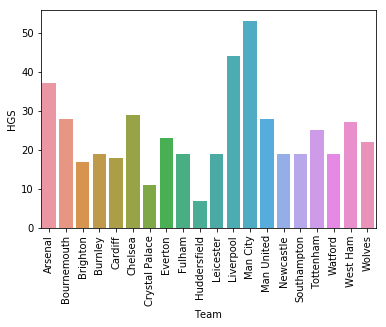

In [15]:
### Plotting the results in a nice bar chart ###

has_plot = sns.barplot(table.Team,table.HGS) # Home Goals Scored
for item in has_plot.get_xticklabels():
    item.set_rotation(90) # so that the x-axis labels are readable

In [16]:
### Man United Stats ###

table[table.Team == "Man United"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
13,Man United,28,30,1.15942,1.56658,18,22,0.939948,0.910973


In [17]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

### Creating a feature table ###
# We will only add HAS, HDS, AAS, ADS since they are the immediate result of HGS, HGC, AGS, AGC

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_HGS = []
f_HGC = []
f_AGS = []
f_AGC = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_HGS.append(table[table['Team'] == row['HomeTeam']]['HGS'].values[0])
    f_HGC.append(table[table['Team'] == row['HomeTeam']]['HGC'].values[0])
    f_AGS.append(table[table['Team'] == row['AwayTeam']]['AGS'].values[0])
    f_AGC.append(table[table['Team'] == row['AwayTeam']]['HGC'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['HGS'] = f_HGS
feature_table['HGC'] = f_HGC
feature_table['AGS'] = f_AGS
feature_table['AGC'] = f_AGC


feature_table.head(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC
0,Man United,Leicester,H,6,4,1.159420,0.939948,1.096606,0.993789,28,18,21,19
1,Bournemouth,Cardiff,H,4,1,1.159420,1.096606,0.469974,1.076605,28,21,9,31
2,Fulham,Crystal Palace,A,6,9,0.786749,1.566580,1.305483,0.993789,19,30,25,17
3,Huddersfield,Chelsea,A,1,4,0.289855,1.253264,1.096606,0.952381,7,24,21,10
4,Newcastle,Tottenham,A,2,5,0.786749,1.044386,1.671018,0.786749,19,20,32,13
5,Watford,Brighton,H,5,0,0.786749,0.992167,0.783290,1.118012,19,19,15,15
6,Wolves,Everton,D,4,5,0.910973,0.992167,1.044386,0.869565,22,19,20,21
7,Arsenal,Man City,A,3,8,1.532091,0.626632,1.357702,0.372671,37,12,26,12
8,Liverpool,West Ham,H,8,2,1.821946,0.469974,0.731070,0.952381,44,9,14,23
9,Southampton,Burnley,D,3,6,0.786749,1.148825,0.835509,1.283644,19,22,16,28


In [18]:
### Representing the result as an integer ### -- this will be the y

def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [19]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [20]:
pred_table = feature_table.tail(10)
feature_table = feature_table[:-10] ### Removing last week so we can predict it

feature_table.tail(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
279,Bournemouth,Man City,A,0,7,1.159420,1.096606,1.357702,0.372671,28,21,26,12,-1
280,Brighton,Huddersfield,H,4,4,0.703934,0.783290,0.574413,1.366460,17,15,11,24,1
281,Burnley,Crystal Palace,A,4,4,0.786749,1.462141,1.305483,0.993789,19,28,25,17,-1
282,Man United,Southampton,H,6,3,1.159420,0.939948,0.783290,1.159420,28,18,15,22,1
283,Tottenham,Arsenal,D,3,4,1.035197,0.678851,1.357702,1.118012,25,13,26,12,0
284,West Ham,Newcastle,H,4,2,1.118012,1.201044,0.626632,0.828157,27,23,12,20,1
285,Wolves,Cardiff,H,6,4,0.910973,0.992167,0.469974,1.076605,22,19,9,31,1
286,Everton,Liverpool,D,3,3,0.952381,1.096606,1.357702,0.372671,23,21,26,9,0
287,Fulham,Chelsea,A,5,7,0.786749,1.566580,1.096606,0.952381,19,30,21,10,-1
288,Watford,Leicester,H,5,2,0.786749,0.992167,1.096606,0.993789,19,19,21,19,1


In [22]:
pred_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
294,Newcastle,Everton,H,7,3,0.786749,1.044386,1.044386,0.869565,19,20,20,21,1
295,Southampton,Tottenham,H,4,5,0.786749,1.148825,1.671018,0.786749,19,22,32,13,1
296,Arsenal,Man United,H,3,4,1.532091,0.626632,1.566580,0.910973,37,12,30,18,1
297,Chelsea,Wolves,D,6,1,1.200828,0.522193,0.835509,0.703934,29,10,16,19,0
298,Liverpool,Burnley,H,5,2,1.821946,0.469974,0.835509,1.283644,44,9,16,28,1
299,Bournemouth,Newcastle,D,3,4,1.159420,1.096606,0.626632,0.828157,28,21,12,20,0
300,Burnley,Leicester,A,2,4,0.786749,1.462141,1.096606,0.993789,19,28,21,19,-1
301,West Ham,Huddersfield,H,5,5,1.118012,1.201044,0.574413,1.366460,27,23,11,24,1
302,Everton,Chelsea,H,8,5,0.952381,1.096606,1.096606,0.952381,23,21,21,10,1
303,Fulham,Liverpool,A,2,6,0.786749,1.566580,1.357702,0.372671,19,30,26,9,-1


# Training the data

In [23]:
### Setting the parameters and the result for our model ###

from sklearn.model_selection import train_test_split

X = feature_table[['HST','AST','HAS','HDS','AAS','ADS','HGS','HGC','AGS','AGC']]
y = feature_table['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
### Printing the shapes ###

print(X_train.shape, X_test.shape)

(220, 10) (74, 10)


In [25]:
### Importing machine learning Classifiers ###

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [26]:
### Comparing 4 Classifiers and their accuracies ###

RFC = RandomForestClassifier()
MNB = MultinomialNB()
XGB = XGBClassifier()
SVC = LinearSVC()

In [27]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5675675675675675
Train Accuracy score:  0.6
[0.66666667 0.7        0.56666667 0.46666667 0.63333333 0.33333333
 0.5862069  0.65517241 0.5        0.78571429]
Mean accuracy score:
0.589376026272578


In [28]:
### RFC ### -- Train accuracy is maybe overfitted here
y_pred = RFC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = RFC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(RFC, X, y, cv=10)
print(scores)
print("Mean accuracy score:")
print(scores.mean())



Test Accuracy score:  0.581081081081081
Train Accuracy score:  0.9818181818181818
[0.53333333 0.63333333 0.46666667 0.56666667 0.43333333 0.43333333
 0.48275862 0.51724138 0.67857143 0.53571429]
Mean accuracy score:
0.5280952380952381


In [29]:
### XGB ### -- a very good accuracy

y_pred = XGB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = XGB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(XGB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5135135135135135
Train Accuracy score:  0.8636363636363636
[0.6        0.66666667 0.5        0.6        0.53333333 0.46666667
 0.55172414 0.5862069  0.60714286 0.71428571]
Mean accuracy score:
0.5826026272577997


In [30]:
### MNB ### -- all accuracies not bad either

y_pred = MNB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = MNB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(MNB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.6216216216216216
Train Accuracy score:  0.6272727272727273
[0.7        0.7        0.5        0.56666667 0.53333333 0.66666667
 0.44827586 0.62068966 0.64285714 0.67857143]
Mean accuracy score:
0.6057060755336618


# Improvements -- Working on

## Adding past games statistics (goals, shots, corners at the moment)

In [46]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]
feat_table.head()


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
303,Fulham,Liverpool,A,1,2,7,16,1,10
302,Everton,Chelsea,H,2,0,15,16,3,4
301,West Ham,Huddersfield,H,4,3,16,15,5,8
300,Burnley,Leicester,A,1,2,13,9,9,3
299,Bournemouth,Newcastle,D,2,2,10,12,6,6


In [47]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Fulham','Man City','D',0,0,0,0,0,0],
                             ['Crystal Palace','Huddersfield','D',0,0,0,0,0,0],
                             ['Leicester','Bournemouth','D',0,0,0,0,0,0],
                             ['Man United','Watford','D',0,0,0,0,0,0],
                             ['Burnley','Wolves','D',0,0,0,0,0,0],
                             ['Brighton','Southampton','D',0,0,0,0,0,0],
                             ['West Ham','Everton','D',0,0,0,0,0,0],
                             ['Cardiff','Chelsea','D',0,0,0,0,0,0],
                             ['Liverpool','Tottenham','D',0,0,0,0,0,0],
                             ['Arsenal','Newcastle','D',0,0,0,0,0,0]],columns=feat_table.columns)

new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
313,Fulham,Man City,D,0,0,0,0,0,0
312,Crystal Palace,Huddersfield,D,0,0,0,0,0,0
311,Leicester,Bournemouth,D,0,0,0,0,0,0
310,Man United,Watford,D,0,0,0,0,0,0
309,Burnley,Wolves,D,0,0,0,0,0,0
308,Brighton,Southampton,D,0,0,0,0,0,0
307,West Ham,Everton,D,0,0,0,0,0,0
306,Cardiff,Chelsea,D,0,0,0,0,0,0
305,Liverpool,Tottenham,D,0,0,0,0,0,0
304,Arsenal,Newcastle,D,0,0,0,0,0,0


In [48]:
feat_table = new_feat_table
feat_table.shape

(314, 9)

In [49]:
# Past Home Shots, Home Corners, Home Goals...

# Adding k recent performance measures
feat_table["past_HS"] = 0.0
feat_table["past_HC"] = 0.0
feat_table["past_AS"] = 0.0
feat_table["past_AC"] = 0.0
feat_table["past_HG"] = 0.0
feat_table["past_AG"] = 0.0

In [50]:
feat_table.head(12)


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG
313,Fulham,Man City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
312,Crystal Palace,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
311,Leicester,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
310,Man United,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
309,Burnley,Wolves,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
308,Brighton,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307,West Ham,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
306,Cardiff,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305,Liverpool,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
304,Arsenal,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
### testing
for index,row in feat_table.iterrows():
    print (row['HomeTeam'], table[table['Team'] == row['HomeTeam']]['HAS'].values)

Fulham [0.78674948]
Crystal Palace [0.45548654]
Leicester [0.78674948]
Man United [1.15942029]
Burnley [0.78674948]
Brighton [0.70393375]
West Ham [1.11801242]
Cardiff [0.74534161]
Liverpool [1.82194617]
Arsenal [1.5320911]
Fulham [0.78674948]
Everton [0.95238095]
West Ham [1.11801242]
Burnley [0.78674948]
Bournemouth [1.15942029]
Liverpool [1.82194617]
Chelsea [1.20082816]
Arsenal [1.5320911]
Southampton [0.78674948]
Newcastle [0.78674948]
Man City [2.19461698]
Leicester [0.78674948]
Huddersfield [0.28985507]
Crystal Palace [0.45548654]
Cardiff [0.74534161]
Watford [0.78674948]
Fulham [0.78674948]
Everton [0.95238095]
Wolves [0.91097308]
West Ham [1.11801242]
Tottenham [1.03519669]
Man United [1.15942029]
Burnley [0.78674948]
Brighton [0.70393375]
Bournemouth [1.15942029]
Southampton [0.78674948]
Man City [2.19461698]
Liverpool [1.82194617]
Crystal Palace [0.45548654]
Chelsea [1.20082816]
Arsenal [1.5320911]
Newcastle [0.78674948]
Leicester [0.78674948]
Huddersfield [0.28985507]
Cardi

In [54]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)
    feat_table.set_value(i, 'past_HC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'past_AC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'past_HS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'past_AS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'past_HG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'past_AG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS   



In [55]:
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
313,Fulham,Man City,D,0,0,0,0,0,0,17.0,4.75,4.00,5.75,0.75,2.75,0.786749,1.566580,0.522193,1.656315
312,Crystal Palace,Huddersfield,D,0,0,0,0,0,0,15.5,7.25,11.00,5.00,2.25,1.00,0.455487,0.887728,1.305483,0.993789
311,Leicester,Bournemouth,D,0,0,0,0,0,0,10.0,5.00,14.75,5.25,2.00,1.25,0.786749,0.992167,1.096606,0.993789
310,Man United,Watford,D,0,0,0,0,0,0,11.0,5.50,16.75,4.75,1.50,2.00,1.159420,0.939948,1.566580,0.910973
309,Burnley,Wolves,D,0,0,0,0,0,0,13.5,7.00,14.75,8.00,1.00,1.00,0.786749,1.462141,0.835509,1.283644


In [56]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)
test_table.head()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
313,Fulham,Man City,D,17.0,4.75,4.00,5.75,0.75,2.75,0.786749,1.566580,0.522193,1.656315
312,Crystal Palace,Huddersfield,D,15.5,7.25,11.00,5.00,2.25,1.00,0.455487,0.887728,1.305483,0.993789
311,Leicester,Bournemouth,D,10.0,5.00,14.75,5.25,2.00,1.25,0.786749,0.992167,1.096606,0.993789
310,Man United,Watford,D,11.0,5.50,16.75,4.75,1.50,2.00,1.159420,0.939948,1.566580,0.910973
309,Burnley,Wolves,D,13.5,7.00,14.75,8.00,1.00,1.00,0.786749,1.462141,0.835509,1.283644


In [57]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [58]:
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(314, 19)


304

In [59]:
X_train = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [38]:
### Try these predictions again

# Adding additional improvements - home advantage

In [61]:
test_table["pastCornerDiff"] = (test_table["past_HC"] - test_table["past_AC"])/k
test_table["pastGoalDiff"] = (test_table["past_HG"] - test_table["past_AG"])/k
test_table["pastShotsDiff"] = (test_table["past_HS"] - test_table["past_AG"])/k

In [64]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split
n_games # for validation purposes

304


289

In [67]:
test_table = test_table.fillna(0)
test_table.tail()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
309,Burnley,Wolves,D,13.5,7.00,14.75,8.00,1.00,1.00,0.786749,1.462141,0.835509,1.283644,0,-0.2500,0.0000,3.1250
310,Man United,Watford,D,11.0,5.50,16.75,4.75,1.50,2.00,1.159420,0.939948,1.566580,0.910973,0,0.1875,-0.1250,2.2500
311,Leicester,Bournemouth,D,10.0,5.00,14.75,5.25,2.00,1.25,0.786749,0.992167,1.096606,0.993789,0,-0.0625,0.1875,2.1875
312,Crystal Palace,Huddersfield,D,15.5,7.25,11.00,5.00,2.25,1.00,0.455487,0.887728,1.305483,0.993789,0,0.5625,0.3125,3.6250
313,Fulham,Man City,D,17.0,4.75,4.00,5.75,0.75,2.75,0.786749,1.566580,0.522193,1.656315,0,-0.2500,-0.5000,3.5625


In [137]:
### Is this manipulation needed?
X_train_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train_0 = test_table['Result'].loc[0:num_games]
X_predict_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]

test_table.drop(['past_HC','past_AS','past_AC','past_HG','past_AG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [138]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
304,0.2500,0.1875,2.5000,1.532091,0.626632,1.357702,1.118012
305,0.2500,0.5000,1.1875,1.821946,0.469974,1.357702,0.372671
306,-0.1875,-0.1250,2.5625,0.745342,1.618799,0.469974,1.076605
307,0.5000,-0.0625,3.8125,1.118012,1.201044,0.731070,0.952381
308,0.2500,-0.0625,2.6875,0.703934,0.783290,0.783290,1.118012
309,-0.2500,0.0000,3.1250,0.786749,1.462141,0.835509,1.283644
310,0.1875,-0.1250,2.2500,1.159420,0.939948,1.566580,0.910973
311,-0.0625,0.1875,2.1875,0.786749,0.992167,1.096606,0.993789
312,0.5625,0.3125,3.6250,0.455487,0.887728,1.305483,0.993789
313,-0.2500,-0.5000,3.5625,0.786749,1.566580,0.522193,1.656315


In [139]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.6666666666666666
Train Accuracy score:  0.5551724137931034
[0.66666667 0.63333333 0.5        0.63333333 0.53333333 0.56666667
 0.51724138 0.65517241 0.60714286 0.82142857]
Mean accuracy score:
0.6134318555008209


# Optimizing for the best value of k


In [156]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)
    
# Random Forest Classifier
plot_scores_RFC = []
for i in range(1,100):
    clf_RFC = RandomForestClassifier(n_estimators=i)
    clf_RFC.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_RFC.predict(X_test))
    plot_scores_RFC.append(scores)
    


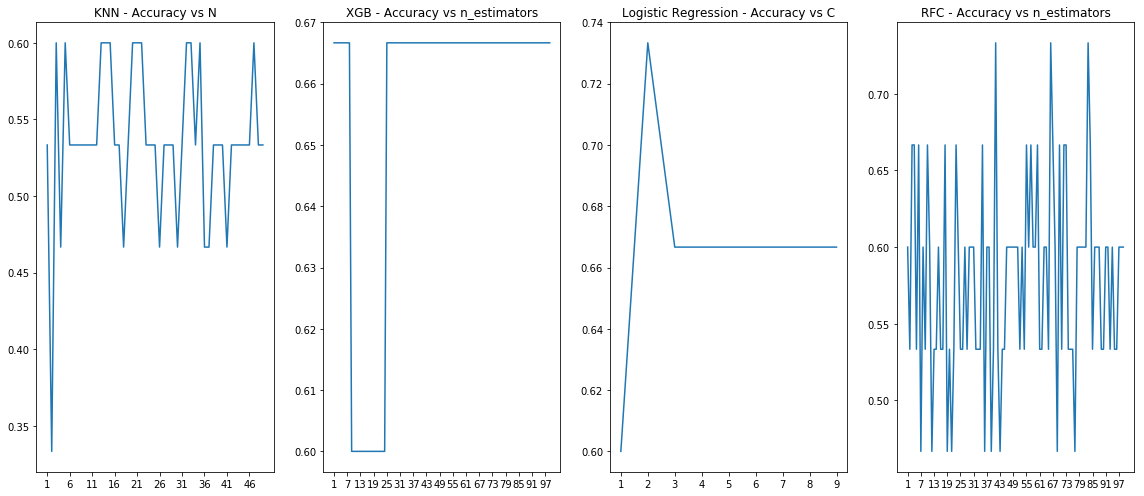

In [157]:
### Plotting the results ###

fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,4,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,4,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,4,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

ax4 = fig.add_subplot(1,4,4)
ax4.plot(range(1,100),plot_scores_RFC);
ax4.set_xticks(range(1,100,6));
ax4.set_title("RFC - Accuracy vs n_estimators")

fig.tight_layout()

In [161]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

max_RFC_e = max(plot_scores_RFC)
max_RFC_ind = plot_scores_RFC.index(max_RFC_e)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)
print(max_RFC_e, max_RFC_ind)


0.6 2
0.6666666666666666 1
0.7333333333333333 1
0.7333333333333333 40


In [162]:
### Training the classifiers ###

KNN = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
LOGREG = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
RFC = RandomForestClassifier(n_estimators=max_RFC_ind).fit(X_train, y_train)
SVC = LinearSVC().fit(X_train, y_train)
MNB = MultinomialNB().fit(X_train_0, y_train_0) # -- do not use difference but just these HC and AC -- doesnt take negative values

In [163]:
y_pred_knn = KNN.predict(X_predict)
y_pred_XGB = XGB.predict(X_predict)
y_pred_logreg = LOGREG.predict(X_predict)
y_pred_rfc = RFC.predict(X_predict)
y_pred_svc = SVC.predict(X_predict)
y_pred_mnb = MNB.predict(X_predict_0)

In [164]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg
this_week['Result_rfc']=y_pred_rfc
this_week['Result_svc']=y_pred_svc
this_week['Result_mnb']=y_pred_mnb
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg,Result_rfc,Result_svc,Result_mnb
304,Arsenal,Newcastle,1,1,1,1,1,1
305,Liverpool,Tottenham,1,1,1,1,1,1
306,Cardiff,Chelsea,-1,-1,-1,-1,-1,-1
307,West Ham,Everton,1,0,1,1,1,1
308,Brighton,Southampton,-1,-1,-1,-1,1,1
309,Burnley,Wolves,-1,1,-1,-1,-1,1
310,Man United,Watford,0,0,1,0,1,1
311,Leicester,Bournemouth,0,1,1,1,1,1
312,Crystal Palace,Huddersfield,0,1,1,0,1,1
313,Fulham,Man City,-1,-1,-1,-1,-1,-1


In [165]:
### Transforming the columns back ###

def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [166]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)
this_week["Res_rfc"] = this_week.apply(lambda row: transformResultBack(row,"Result_rfc"),axis=1)
this_week["Res_svc"] = this_week.apply(lambda row: transformResultBack(row,"Result_svc"),axis=1)
this_week["Res_mnb"] = this_week.apply(lambda row: transformResultBack(row,"Result_mnb"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg","Result_rfc","Result_svc","Result_mnb"],axis=1,inplace=True)

In [169]:
this_week

,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg,Res_rfc,Res_svc,Res_mnb
304,Arsenal,Newcastle,H,H,H,H,H,H
305,Liverpool,Tottenham,H,H,H,H,H,H
306,Cardiff,Chelsea,A,A,A,A,A,A
307,West Ham,Everton,H,D,H,H,H,H
308,Brighton,Southampton,A,A,A,A,H,H
309,Burnley,Wolves,A,H,A,A,A,H
310,Man United,Watford,D,D,H,D,H,H
311,Leicester,Bournemouth,D,H,H,H,H,H
312,Crystal Palace,Huddersfield,D,H,H,D,H,H
313,Fulham,Man City,A,A,A,A,A,A


In [ ]:
"""
Predictions:
Arsenal draw
Lfc draw
Chelsea
West ham
Southampton draw
Wolves
Man utd
Bournemouth
Crystal draw
Man city




"""